# Endoscopes Pet-projcet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
observe = pd.read_csv(r'C:\Users\Yuri\Desktop\Pet_project\filtred.csv')

Посмотрим на изначальный "сырой" датафрейм.

In [3]:
observe.head()

,Тип,Фирма-производитель,Страна-производитель,Клиент,Отсутствие изображения,Помехи на изображении,Замутнение изображения,Пересвет изображения,Отсутствие освещения,Повреждение жгута световодов,...,Залитие камеры,Засор канала вода/воздух,Перфорация резиновой оболочки изгибаемой секции,Срок эксплуатации,Гарантия,Повторный ремонт,Серьезность поломки (возможна-ли дальнейшая эксплуатация без ремонта),Время от ввода в эксплуатацию до попадания в сервисный центр,Отказ от ремонта,Стоимость ремонта
0,"1 ""Гастроскопы"" 2 ""Колоноскопы"" 3 ""Бронх...","1 ""Aohua"" 2 ""Olympus"" 3 ""Pentax""","1 ""КНР"" 2 ""Япония""","1 ""Частный"" 2 ""Государственное учереждение""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""",...,"1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Менее года"" 2 ""1-2 года"" 3 ""Более 2-х...","1 ""Гарантия"" 2 ""Не гарантия"" 3 ""Частична...","1 ""Да"" 2 ""Нет""","1 ""Серьезная"" 2 ""Несерьезная""",Количество месяцев,"1 ""Да"" 2 ""Нет"" 3 ""Частичный""",Рублей
1,1,1,1,1,2,2,2,2,2,2,...,2,2,2,1,3,2,2,4,2,52220
2,1,1,1,1,2,2,2,2,2,2,...,2,2,2,1,3,2,1,10,2,18160
3,2,1,1,2,2,2,1,2,2,2,...,2,2,2,2,3,2,1,20,3,97904
4,2,1,1,1,2,2,2,2,2,2,...,2,2,2,1,1,2,2,11,2,0


In [4]:
observe.shape

(383, 77)

Преобразую названия колонок в более удобный для работы вид. Так как колонок много, вместо метода rename(columns = {....
изменю их название в самом файле и считаю заново.

In [5]:
df = pd.read_csv(r'C:\Users\Yuri\Desktop\Pet_project\translated.csv')

In [6]:
df

,type,firm,country,client_type,image_absence,image_noize,image_foggy,image_overexposure,light_absence,light_guide_damage,...,camera_water_damage,aw_channel_clogged,bending_rubber_leak,time_in_use,warranty,re_repair,severity_breakdown,time_to_first_repair,repair_refused,repair_cost
0,"1 ""Гастроскопы"" 2 ""Колоноскопы"" 3 ""Бронх...","1 ""Aohua"" 2 ""Olympus"" 3 ""Pentax""","1 ""КНР"" 2 ""Япония""","1 ""Частный"" 2 ""Государственное учереждение""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""",...,"1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Да"" 2 ""Нет""","1 ""Менее года"" 2 ""1-2 года"" 3 ""Более 2-х...","1 ""Гарантия"" 2 ""Не гарантия"" 3 ""Частична...","1 ""Да"" 2 ""Нет""","1 ""Серьезная"" 2 ""Несерьезная""",Количество месяцев,"1 ""Да"" 2 ""Нет"" 3 ""Частичный""",Рублей
1,1,1,1,1,2,2,2,2,2,2,...,2,2,2,1,3,2,2,4,2,52220
2,1,1,1,1,2,2,2,2,2,2,...,2,2,2,1,3,2,1,10,2,18160
3,2,1,1,2,2,2,1,2,2,2,...,2,2,2,2,3,2,1,20,3,97904
4,2,1,1,1,2,2,2,2,2,2,...,2,2,2,1,1,2,2,11,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,1,3,2,1,2,2,2,2,2,2,...,2,2,2,3,2,1,1,26,2,173490
379,2,3,2,1,2,2,2,2,2,2,...,2,2,2,3,2,2,1,27,3,91810
380,1,3,2,1,2,2,2,2,2,2,...,2,1,2,2,2,1,1,22,2,75500
381,2,3,2,1,2,2,2,2,2,2,...,2,2,2,1,1,2,2,12,2,0


In [7]:
df.dtypes

type                    object
firm                    object
country                 object
client_type             object
image_absence           object
                         ...  
re_repair               object
severity_breakdown      object
time_to_first_repair    object
repair_refused          object
repair_cost             object
Length: 77, dtype: object

In [8]:
df.dtypes.nunique()

1

Сразу видны некоторые особенности, что все значения представлены в виде объектов, даже те значения, которые по-хорошему должны быть других типов. Это связяно с тем, что изначально данные собирались вручную в excel файл с дальнейшей конвертацией в csv. 
Например, столбцы time_to_first_repair и repair_cost было бы удобно представить в виде численного представления.
Также, строка[0] на момент реализации задумывалась для описания и расшифровки, но в данном случае она не несет полезной информации для анализа.

In [9]:
df = df[1:]

In [10]:
df.head(3)

,type,firm,country,client_type,image_absence,image_noize,image_foggy,image_overexposure,light_absence,light_guide_damage,...,camera_water_damage,aw_channel_clogged,bending_rubber_leak,time_in_use,warranty,re_repair,severity_breakdown,time_to_first_repair,repair_refused,repair_cost
1,1,1,1,1,2,2,2,2,2,2,...,2,2,2,1,3,2,2,4,2,52220
2,1,1,1,1,2,2,2,2,2,2,...,2,2,2,1,3,2,1,10,2,18160
3,2,1,1,2,2,2,1,2,2,2,...,2,2,2,2,3,2,1,20,3,97904


In [11]:
df = df.astype({'time_to_first_repair': 'int64', 'repair_cost': 'int64'})
df

,type,firm,country,client_type,image_absence,image_noize,image_foggy,image_overexposure,light_absence,light_guide_damage,...,camera_water_damage,aw_channel_clogged,bending_rubber_leak,time_in_use,warranty,re_repair,severity_breakdown,time_to_first_repair,repair_refused,repair_cost
1,1,1,1,1,2,2,2,2,2,2,...,2,2,2,1,3,2,2,4,2,52220
2,1,1,1,1,2,2,2,2,2,2,...,2,2,2,1,3,2,1,10,2,18160
3,2,1,1,2,2,2,1,2,2,2,...,2,2,2,2,3,2,1,20,3,97904
4,2,1,1,1,2,2,2,2,2,2,...,2,2,2,1,1,2,2,11,2,0
5,1,1,1,1,2,2,2,2,2,2,...,2,2,2,2,3,2,1,15,2,92530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,1,3,2,1,2,2,2,2,2,2,...,2,2,2,3,2,1,1,26,2,173490
379,2,3,2,1,2,2,2,2,2,2,...,2,2,2,3,2,2,1,27,3,91810
380,1,3,2,1,2,2,2,2,2,2,...,2,1,2,2,2,1,1,22,2,75500
381,2,3,2,1,2,2,2,2,2,2,...,2,2,2,1,1,2,2,12,2,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 1 to 382
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   type                         382 non-null    object
 1   firm                         382 non-null    object
 2   country                      382 non-null    object
 3   client_type                  382 non-null    object
 4   image_absence                382 non-null    object
 5   image_noize                  382 non-null    object
 6   image_foggy                  382 non-null    object
 7   image_overexposure           382 non-null    object
 8   light_absence                382 non-null    object
 9   light_guide_damage           382 non-null    object
 10  lens_damage                  382 non-null    object
 11  lens_absence                 382 non-null    object
 12  lens_carck                   382 non-null    object
 13  distal_cover_damage          382 no

In [13]:
df.describe()

,time_to_first_repair,repair_cost
count,382.000000,382.000000
mean,20.625654,132456.565445
std,13.402459,157345.348602
min,1.000000,0.000000
25%,11.000000,10686.000000
50%,18.000000,73040.000000
75%,27.000000,182145.000000
max,83.000000,798000.000000


In [14]:
df.columns

Index(['type', 'firm', 'country', 'client_type', 'image_absence',
       'image_noize', 'image_foggy', 'image_overexposure ', 'light_absence',
       'light_guide_damage', 'lens_damage', 'lens_absence', 'lens_carck',
       'distal_cover_damage', 'lens_glue_damage', 'nozzle_deformation',
       'nozzle_absence', 'nozzle_clogged', 'pcb_leak',
       'angle_wire_angle_adjustment', 'angle_wire_play',
       'bending_rubber_damage', 'bending_rubber_glue_damage',
       'bending_section_defective', 'bending_section_damage',
       'angle_wire_rapture', 'ift_coating_damage', 'ift_leak', 'ift_bend',
       'staycoil_damage', 'dtaycoil_rapture', 'biopsy_channel_leak',
       'biopsy_channel_bend', 'biopsy_channel_clogged', 'aw_tubes_leak',
       'handle_cover_damage', 'rubber_cone_damage', 'drive_units_damage',
       'lock_damage', 'button1_damage', 'button2_damage', 'button3_damage',
       'handle_leak', 'drive_units_leak', 'lg_gacle_leak', 'lg_cable_bend',
       'lg_w_tube_bend', 'lg_a_t

Исправляю обнаруженную опечатку:

In [15]:
df.rename(columns = {'dtaycoil_rapture': 'staycoil_rapture'}, inplace=True)

Создадим отдельную таблицу, в которой будут включены только неисправности:

In [16]:
malfunctions = df.drop(['type', 'firm', 'country', 'client_type', 'time_in_use', 'warranty', 're_repair', \
                        'severity_breakdown', 'time_to_first_repair', 'repair_refused', 'repair_cost'], axis=1)

In [17]:
columns_list = malfunctions.columns.tolist()

In [18]:
malfunctions_frequency_list = []
malfunctions_name_list = []

In [19]:
for i in columns_list:
    print('{} fault frequency is {}'.format \
          (i, round((malfunctions[i] == '1').sum()/len(malfunctions[i] == '1')* 100)), 2, sep='.')
    malfunctions_frequency_list.append((malfunctions[i] == '1').sum()/len(malfunctions[i] == '1')* 100)
    malfunctions_name_list.append(i)

image_absence fault frequency is 13.2
image_noize fault frequency is 12.2
image_foggy fault frequency is 7.2
image_overexposure  fault frequency is 6.2
light_absence fault frequency is 1.2
light_guide_damage fault frequency is 4.2
lens_damage fault frequency is 12.2
lens_absence fault frequency is 3.2
lens_carck fault frequency is 6.2
distal_cover_damage fault frequency is 10.2
lens_glue_damage fault frequency is 31.2
nozzle_deformation fault frequency is 18.2
nozzle_absence fault frequency is 7.2
nozzle_clogged fault frequency is 8.2
pcb_leak fault frequency is 18.2
angle_wire_angle_adjustment fault frequency is 52.2
angle_wire_play fault frequency is 58.2
bending_rubber_damage fault frequency is 32.2
bending_rubber_glue_damage fault frequency is 61.2
bending_section_defective fault frequency is 6.2
bending_section_damage fault frequency is 8.2
angle_wire_rapture fault frequency is 6.2
ift_coating_damage fault frequency is 14.2
ift_leak fault frequency is 2.2
ift_bend fault frequency 

In [20]:
malfunctions_dict = dict(zip(malfunctions_name_list, (malfunctions_frequency_list)))

In [21]:
sorted_tuple = sorted(malfunctions_dict.items(), key=lambda x: x[1], reverse=True)

Получили отсортированный словарь, где ключ - неисправность, значение - частота её встречаемости. Эта таблица уже дает общее понимание о частоте тех или иных неисправностей.

In [22]:
dict(sorted_tuple)

{'bending_rubber_glue_damage': 60.73298429319372,
 'angle_wire_play': 58.37696335078534,
 'angle_wire_angle_adjustment': 51.832460732984295,
 'bending_rubber_damage': 32.19895287958115,
 'lens_glue_damage': 31.413612565445025,
 'ift_bend': 18.586387434554975,
 'pcb_leak': 18.32460732984293,
 'nozzle_deformation': 17.801047120418847,
 'lock_damage': 16.49214659685864,
 'biopsy_channel_leak': 15.18324607329843,
 'ift_coating_damage': 14.397905759162304,
 'pcb_water_damage': 13.612565445026178,
 'image_absence': 13.089005235602095,
 'camera_water_damage': 12.56544502617801,
 'image_noize': 11.518324607329843,
 'lens_damage': 11.518324607329843,
 'aw_tubes_leak': 11.518324607329843,
 'distal_end_water_damage': 11.2565445026178,
 'connector_water_damage': 10.732984293193718,
 'distal_cover_damage': 10.209424083769633,
 'aw_channel_clogged': 10.209424083769633,
 'ift_water_damage': 9.68586387434555,
 'handle_water_damage': 9.162303664921465,
 'nozzle_clogged': 7.853403141361256,
 'bending_se

Так как в данном датафрейме много категориальных данных, по типу отказался клиент от ремонта или нет, в каком учреждении, государственном или частном, эксплуатируется тот или иной эндоскоп конкретного производителя, то для анализа особый интерес могут представлять группироки данных.

In [23]:
# 'type', 'firm', 'country', 'client_type', 'time_in_use', 'warranty', 're_repair', 
# 'severity_breakdown', 'time_to_first_repair', 'repair_refused', 'repair_cost'

Если в случае неисправностей, запись в виде "1" - нисправность присутствует, "2" - нисправность отсутствует удобна для восприятия и понимания, то для столбцов типа 'firm', 'country', 'client_type' и т. д. имеет смысл заменить закодированные значения на их реальные значения.

In [24]:
df = df.replace({'type' : { '1' : 'gastro', '2' : 'colono', '3' : 'broncho', '4' : 'veterinary'},
            'firm' : { '1' : 'aohua', '2' : 'opympus', '3' : 'pentax'},
            'country' : { '1' : 'china', '2' : 'japan'},
            'client_type' : { '1' : 'private', '2' : 'state'},
            'time_in_use' : { '1' : 'less_than_year', '2' : 'one_two_years', '3' : 'more_than_three_years'},
            'warranty' : { '1' : 'confirmed', '2' : 'rejected', '3' : 'partially'}
           })
df

,type,firm,country,client_type,image_absence,image_noize,image_foggy,image_overexposure,light_absence,light_guide_damage,...,camera_water_damage,aw_channel_clogged,bending_rubber_leak,time_in_use,warranty,re_repair,severity_breakdown,time_to_first_repair,repair_refused,repair_cost
1,gastro,aohua,china,private,2,2,2,2,2,2,...,2,2,2,less_than_year,partially,2,2,4,2,52220
2,gastro,aohua,china,private,2,2,2,2,2,2,...,2,2,2,less_than_year,partially,2,1,10,2,18160
3,colono,aohua,china,state,2,2,1,2,2,2,...,2,2,2,one_two_years,partially,2,1,20,3,97904
4,colono,aohua,china,private,2,2,2,2,2,2,...,2,2,2,less_than_year,confirmed,2,2,11,2,0
5,gastro,aohua,china,private,2,2,2,2,2,2,...,2,2,2,one_two_years,partially,2,1,15,2,92530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,gastro,pentax,japan,private,2,2,2,2,2,2,...,2,2,2,more_than_three_years,rejected,1,1,26,2,173490
379,colono,pentax,japan,private,2,2,2,2,2,2,...,2,2,2,more_than_three_years,rejected,2,1,27,3,91810
380,gastro,pentax,japan,private,2,2,2,2,2,2,...,2,1,2,one_two_years,rejected,1,1,22,2,75500
381,colono,pentax,japan,private,2,2,2,2,2,2,...,2,2,2,less_than_year,confirmed,2,2,12,2,0


Интерес представляет зависимость стоимости ремонта и срока обращения в сервисный центр.

<AxesSubplot:xlabel='time_to_first_repair', ylabel='repair_cost'>

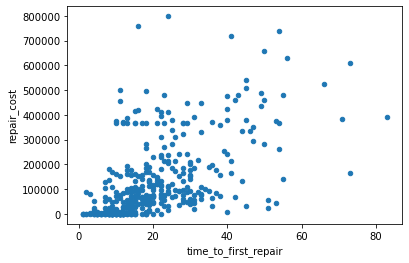

In [25]:
df.plot.scatter(x='time_to_first_repair', y ='repair_cost')

Можно отметить то, что распределение имеет ярко выраженную гетероскедастичность.

Отличаются ли условия эксплуатации в частный клиниках и государственных учреждениях?

In [26]:
df.groupby(['client_type', 'firm']).agg({'repair_cost': 'mean', 'time_to_first_repair': 'mean'})

repair_cost  time_to_first_repair
client_type firm                                        
private     aohua    123275.755102             18.374150
            opympus  205155.172414             27.603448
            pentax   158866.785714             23.571429
state       aohua     77026.620000             17.050000
            opympus  184361.111111             25.500000
            pentax   137687.692308             22.615385

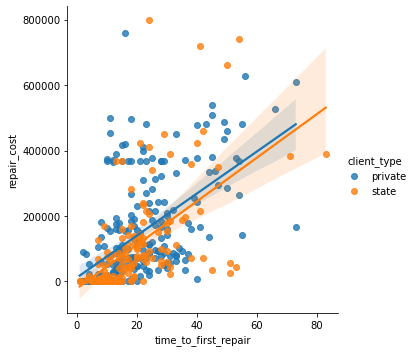

In [27]:
sns.lmplot(x='time_to_first_repair', y ='repair_cost', hue='client_type', data = df)

Видно, что корреляция высока и это говорит о том, что условия эксплуатации в государственных и частных учреждених отличаются незначительно.

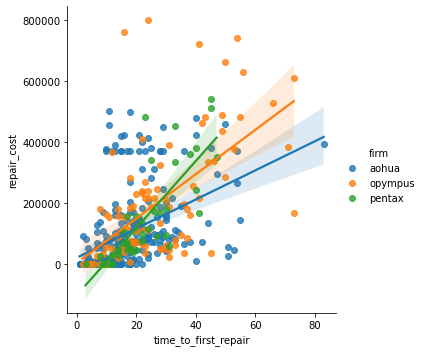

In [46]:
sns.lmplot(x='time_to_first_repair', y ='repair_cost', hue='firm', data = df)

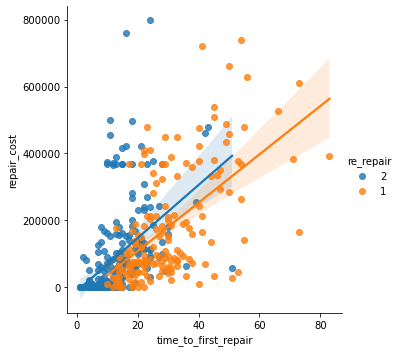

In [47]:
sns.lmplot(x='time_to_first_repair', y ='repair_cost', hue='re_repair', data = df)

<AxesSubplot:>

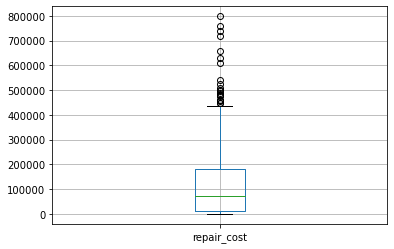

In [29]:
df.boxplot(column='repair_cost')

<AxesSubplot:>

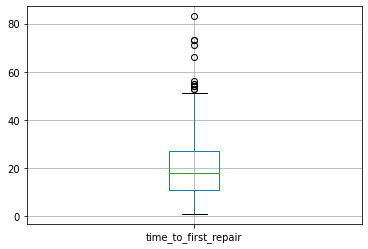

In [30]:
df.boxplot(column='time_to_first_repair')

Попробуем предсказать, откажется ли от ремонта клиент.

In [31]:
X = df.drop('repair_refused', axis=1)
y = df.repair_refused

In [32]:
X = pd.get_dummies(X)
X.head()

,time_to_first_repair,repair_cost,type_broncho,type_colono,type_gastro,type_veterinary,firm_aohua,firm_opympus,firm_pentax,country_china,...,time_in_use_less_than_year,time_in_use_more_than_three_years,time_in_use_one_two_years,warranty_confirmed,warranty_partially,warranty_rejected,re_repair_1,re_repair_2,severity_breakdown_1,severity_breakdown_2
1,4,52220,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,1
2,10,18160,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,1,0
3,20,97904,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,1,0
4,11,0,0,1,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
5,15,92530,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,1,0


In [33]:
clf = tree.DecisionTreeClassifier(random_state=7)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [36]:
clf.score(X_test, y_test)

0.6883116883116883

In [37]:
cross_val_score(clf, X_train, y_train , cv=5)

array([0.70491803, 0.68852459, 0.73770492, 0.75409836, 0.68852459])

In [38]:
cross_val_score(clf, X_train, y_train , cv=5).mean()

0.7147540983606557

Подберем оптимальные параметры на обучающей выборке при помощи метода GridSearchCV, а также вместо одного дерева применим RandomForestClassifier

In [39]:
clf_rf = RandomForestClassifier(random_state=7)

In [40]:
parametrs = {'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [41]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [42]:
best_clf = RandomForestClassifier(criterion='gini', max_depth=2, random_state=7)

In [43]:
best_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=7)

In [44]:
best_clf.score(X_train, y_train)

0.7672131147540984

In [45]:
best_clf.score(X_test, y_test)

0.7402597402597403